In [1]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import numpy as np

In [5]:
'''
import zipfile
!unzip /content/CovidXRayImages.zip
'''

'\nimport zipfile\n!unzip /content/CovidXRayImages.zip\n'

In [2]:
import glob
glob.glob('/content/CovidXRayImages.zip')

['/content/CovidXRayImages.zip']

In [3]:
# Accesing dataset folder
dataset_folder = r"/content/Val"

#classes in dataset
classes = ['COVID-19', 'Non-COVID', 'Normal']

In [4]:
# Initializing empty lists for images, masks, and labels
images = []
masks = []
labels = []

In [5]:
#setting image size
target_size = (224, 224)

# Looping through each class folder
for class_name in classes:
    class_folder = os.path.join(dataset_folder, class_name, 'images')
    mask_folder = os.path.join(dataset_folder, class_name, 'lung masks')

    for filename in os.listdir(class_folder):
        img_path = os.path.join(class_folder, filename)
        mask_path = os.path.join(mask_folder, filename)

        # Load and resize the image
        img = image.load_img(img_path, target_size=target_size, color_mode='grayscale')
        img_array = image.img_to_array(img)

        # Load and resize the mask
        mask = image.load_img(mask_path, target_size=target_size, color_mode='grayscale')
        mask_array = image.img_to_array(mask)

        # Appending to the lists
        images.append(img_array)
        masks.append(mask_array)
        labels.append(classes.index(class_name))

# Converting lists to NumPy arrays
images = np.array(images)
masks = np.array(masks)
labels = to_categorical(labels, num_classes=len(classes))

# New Section

In [6]:
# Printing the size & shape of images and masks and labels
print(" Image Size:", images.shape)
print(" Mask Size:", masks.shape)
print(" Label Size:", labels.shape)

 Image Size: (5417, 224, 224, 1)
 Mask Size: (5417, 224, 224, 1)
 Label Size: (5417, 3)


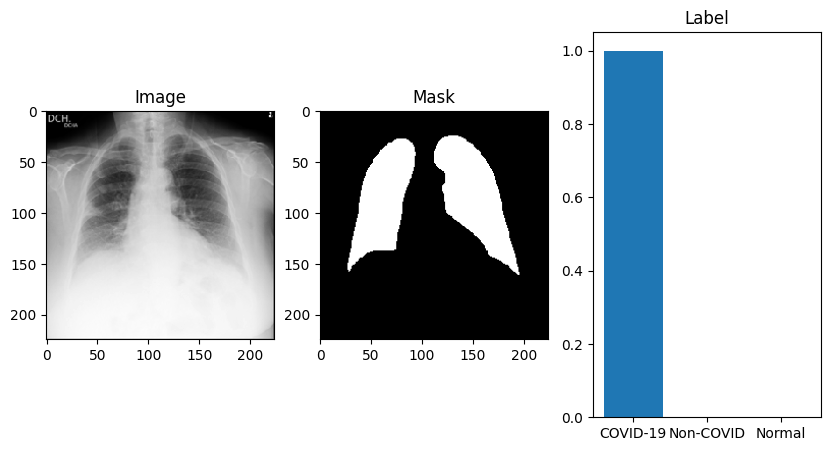

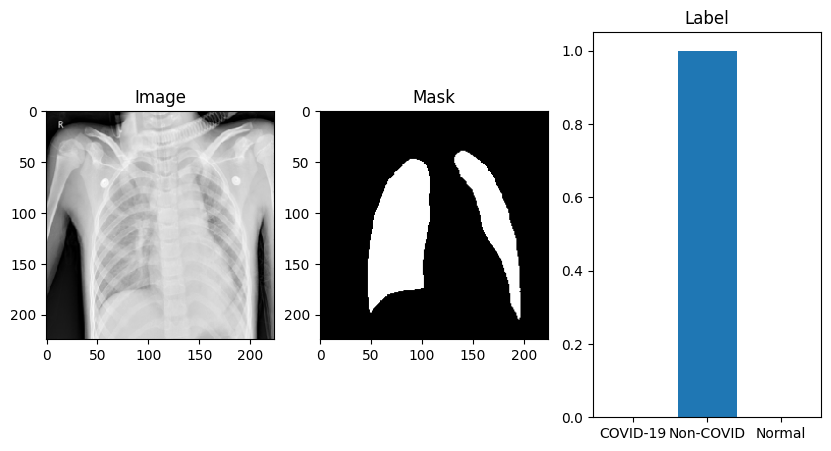

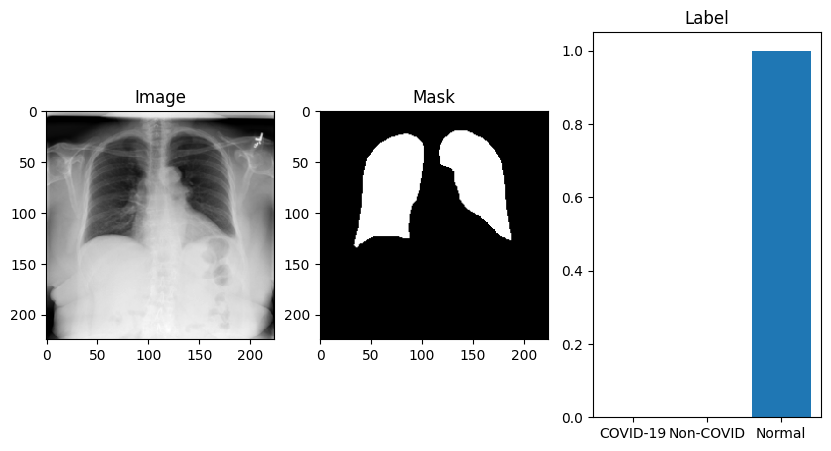

In [7]:
import matplotlib.pyplot as plt

# Choosing a few random indices to display
indices_to_display = np.random.choice(len(images), size=3, replace=False)

for idx in indices_to_display:
    # Display the image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(images[idx].reshape(images[idx].shape[:-1]), cmap='gray')
    plt.title('Image')

    # Display the mask
    plt.subplot(1, 3, 2)
    plt.imshow(masks[idx].reshape(masks[idx].shape[:-1]), cmap='gray')
    plt.title('Mask')

    # Display the label
    plt.subplot(1, 3, 3)
    plt.bar(range(lhttps://www.linkedin.com/learning/search?keywords=meachine%20learning&u=2148769en(classes)), labels[idx])
    plt.xticks(range(len(classes)), classes)
    plt.title('Label')

    plt.show()


In [8]:
# Combining images, masks, and labels
combined_data = list(zip(images, masks, labels))

from sklearn.model_selection import train_test_split

# Spliting the combined data into training, validation, and test sets
train_data, temp_data = train_test_split(combined_data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Unpacking the data into separate lists
X_train, masks_train, y_train = zip(*train_data)
X_val, masks_val, y_val = zip(*val_data)
X_test, masks_test, y_test = zip(*test_data)

# Converting lists to NumPy arrays
X_train = np.array(X_train)
masks_train = np.array(masks_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
masks_val = np.array(masks_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
masks_test = np.array(masks_test)
y_test = np.array(y_test)

# Printing the size of each set
print("X_train size:", X_train.shape)
print("masks_train size:", masks_train.shape)
print("y_train size:", y_train.shape)

print("X_val size:", X_val.shape)
print("masks_val size:", masks_val.shape)
print("y_val size:", y_val.shape)

print("X_test size:", X_test.shape)
print("masks_test size:", masks_test.shape)
print("y_test size:", y_test.shape)

X_train size: (4333, 224, 224, 1)
masks_train size: (4333, 224, 224, 1)
y_train size: (4333, 3)
X_val size: (542, 224, 224, 1)
masks_val size: (542, 224, 224, 1)
y_val size: (542, 3)
X_test size: (542, 224, 224, 1)
masks_test size: (542, 224, 224, 1)
y_test size: (542, 3)


In [9]:
from sklearn.preprocessing import normalize, StandardScaler

scaler = StandardScaler()

# Normalizing and Standardizing the data
X_train_normalized = normalize(X_train.reshape(X_train.shape[0], -1), axis=1).reshape(X_train.shape)
X_train_standardized = scaler.fit_transform(X_train_normalized.reshape(X_train.shape[0], -1)).reshape(X_train.shape)

X_val_normalized = normalize(X_val.reshape(X_val.shape[0], -1), axis=1).reshape(X_val.shape)
X_val_standardized = scaler.transform(X_val_normalized.reshape(X_val.shape[0], -1)).reshape(X_val.shape)

X_test_normalized = normalize(X_test.reshape(X_test.shape[0], -1), axis=1).reshape(X_test.shape)
X_test_standardized = scaler.transform(X_test_normalized.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization

#Simple CNN model for image data
def create_image_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    return model

In [13]:
# simple CNN model for mask data
def create_mask_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    return model

In [15]:
# input shape for images and masks
inputshape = (224, 224, 1)

In [17]:
# Create models for  image and mask
imagemodel = create_image_model(inputshape)
maskmodel = create_mask_model(inputshape)

In [18]:
# Compile both models
imagemodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
maskmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# train image model on X_train and y_train
imagemodel.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
136/136 [==============================] - 485s 4s/step - loss: 20.7848 - accuracy: 0.5846 - val_loss: 0.7393 - val_accuracy: 0.7214
Epoch 2/5
136/136 [==============================] - 528s 4s/step - loss: 0.6965 - accuracy: 0.7258 - val_loss: 0.7244 - val_accuracy: 0.7214
Epoch 3/5
136/136 [==============================] - 520s 4s/step - loss: 0.6578 - accuracy: 0.7457 - val_loss: 3.4826 - val_accuracy: 0.3875
Epoch 4/5
136/136 [==============================] - 484s 4s/step - loss: 0.5496 - accuracy: 0.7914 - val_loss: 0.7385 - val_accuracy: 0.7583
Epoch 5/5
136/136 [==============================] - 485s 4s/step - loss: 0.4731 - accuracy: 0.8401 - val_loss: 0.9582 - val_accuracy: 0.7159


In [21]:
# train mask model on masks_train and y_train
maskmodel.fit(masks_train, y_train, epochs=5, batch_size=32, validation_data=(masks_val, y_val))

Epoch 1/5
136/136 [==============================] - 482s 4s/step - loss: 6.9572 - accuracy: 0.4796 - val_loss: 0.9593 - val_accuracy: 0.5295
Epoch 2/5
136/136 [==============================] - 474s 3s/step - loss: 0.7896 - accuracy: 0.6388 - val_loss: 0.9537 - val_accuracy: 0.5424
Epoch 3/5
136/136 [==============================] - 470s 3s/step - loss: 0.5043 - accuracy: 0.7953 - val_loss: 1.0704 - val_accuracy: 0.5443
Epoch 4/5
136/136 [==============================] - 464s 3s/step - loss: 0.2092 - accuracy: 0.9275 - val_loss: 1.6796 - val_accuracy: 0.5295
Epoch 5/5
136/136 [==============================] - 469s 3s/step - loss: 0.0709 - accuracy: 0.9781 - val_loss: 2.1947 - val_accuracy: 0.5240


In [22]:
# Evaluate both models on test dataset
imagemodel.evaluate(X_test, y_test)
maskmodel.evaluate(masks_test, y_test)

17/17 [==============================] - 21s 1s/step - loss: 1.9765 - accuracy: 0.5129


[1.976479172706604, 0.5129151344299316]

In [23]:
# Combine predictions by taking avegae
combinedpredictions = 0.5 * (imagemodel.predict(X_test) + maskmodel.predict(masks_test))

17/17 [==============================] - 17s 1s/step


In [3]:
# Plot the ROC AUC scores using a line chart
plt.figure(figsize=(8, 6))
plt.plot(classes, auc_scores, marker='o', linestyle='-')
plt.title('AUC Scores for Each Class')
plt.xlabel('Classes')
plt.ylabel('AUC Score')
plt.grid(True)  # Add grid lines for better readability
plt.show()


NameError: name 'plt' is not defined

AUC for class 'COVID-19': 0.8622
AUC for class 'Non-COVID': 0.8191
AUC for class 'Normal': 0.8439


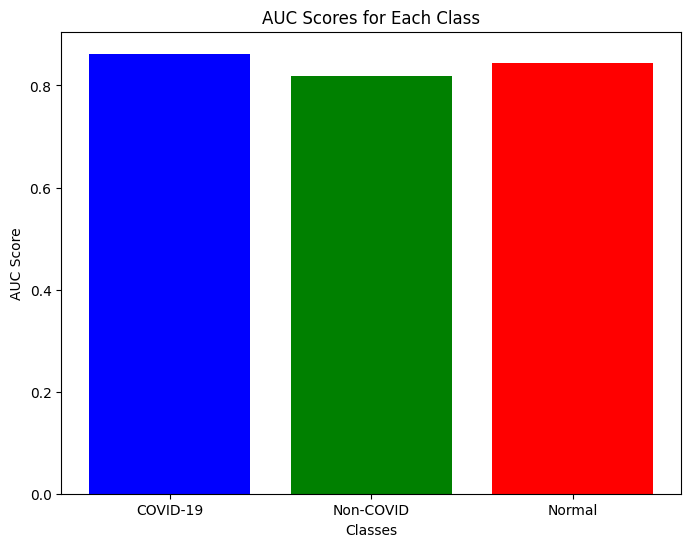

In [29]:
from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# AUC Scores
aucscores = []
for i in range(len(classes)):
    auc = roc_auc_score(y_test[:, i], combinedpredictions[:, i])
    aucscores.append(auc)
    print(f"AUC for class '{classes[i]}': {auc:.4f}")

# Plot the ROC AUC scores
plt.figure(figsize=(8, 6))
plt.bar(classes, aucscores, color=['blue', 'green', 'red'])
plt.title('AUC Scores for Each Class')
plt.xlabel('Classes')
plt.ylabel('AUC Score')
plt.show()


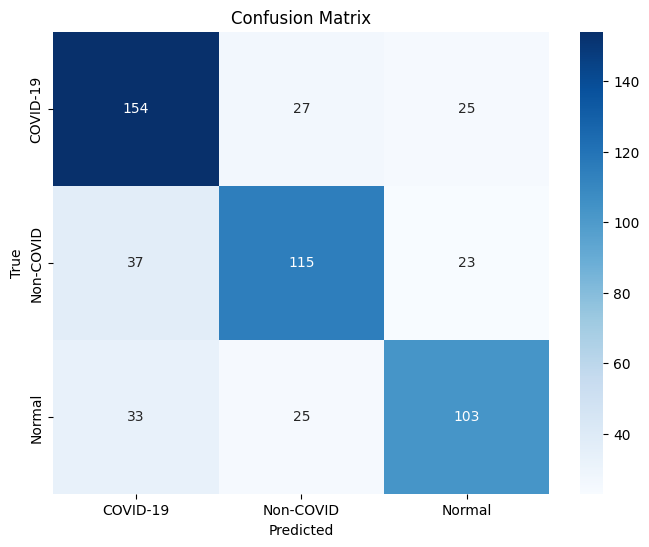

In [32]:
# Convert predictions to class labels
combinedlabels = np.argmax(combinedpredictions, axis=1)
truelabels = np.argmax(y_test, axis=1)

# Confusion Matrix
confmatrix = confusion_matrix(truelabels, combinedlabels, labels=np.arange(len(classes)))

# Plot  Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()